# Instalación Librerias

In [ ]:
%pip install numpy

In [ ]:
%pip install matplotlib
%pip install pandas

In [ ]:
%pip install scipy

In [ ]:
%pip install seaborn

In [ ]:
%pip install PyWavelets

In [ ]:
%pip install statsmodels

In [ ]:
%pip install scikit-image

In [ ]:
%pip install neurokit2

# Imporatción libreria

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal
from scipy.signal import butter, filtfilt, firwin, lfilter, welch
from random import randrange
from scipy import fft
import os
import seaborn as sns
import neurokit2 as nk
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

# Carga datos de prueba (10 señales aleatorias)

In [3]:
file_path = 'Diagnostics.csv'
diagnos_data = pd.read_csv(file_path)
diagnos_data.head()

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354


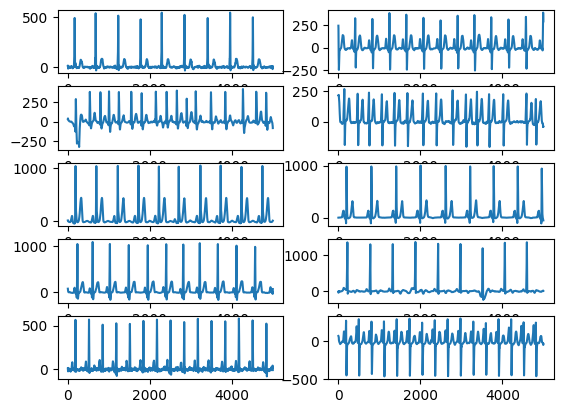

In [158]:
All_pacients = diagnos_data['FileName']
List_pacients=All_pacients.tolist()
folder_dir = 'ECGDataDenoised/'
random_signals=[]
for i in range(0,10):
    file_path = folder_dir+List_pacients[randrange(len(List_pacients))]+'.csv'
    ecg_data = pd.read_csv(file_path,names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
    senal = ecg_data['II'].values
    random_signals.append(senal)

for i in range(len(random_signals)):
  random_signals[i]=random_signals[i][1:]

for i in range(len(random_signals)):
  plt.subplot(5,2,i+1)
  plt.plot(random_signals[i])
plt.show()
    

In [ ]:
columnas=['ECG_Rate_Mean', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1','HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD','HRV_SDSD', 'HRV_CVNN', 
'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN','HRV_MCVNN', 'HRV_IQRNN', 'HRV_SDRMSSD', 'HRV_Prc20NN', 'HRV_Prc80NN','HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI',
'HRV_TINN', 'HRV_ULF', 'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_VHF','HRV_TP', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1','HRV_SD2', 'HRV_SD1SD2', 'HRV_S', 'HRV_CSI', 
'HRV_CVI','HRV_CSI_Modified', 'HRV_PIP', 'HRV_IALS', 'HRV_PSS', 'HRV_PAS','HRV_GI', 'HRV_SI', 'HRV_AI', 'HRV_PI', 'HRV_C1d', 'HRV_C1a','HRV_SD1d', 'HRV_SD1a', 'HRV_C2d', 
'HRV_C2a', 'HRV_SD2d', 'HRV_SD2a','HRV_Cd', 'HRV_Ca', 'HRV_SDNNd', 'HRV_SDNNa', 'HRV_DFA_alpha1','HRV_MFDFA_alpha1_Width', 'HRV_MFDFA_alpha1_Peak','HRV_MFDFA_alpha1_Mean', 
'HRV_MFDFA_alpha1_Max','HRV_MFDFA_alpha1_Delta', 'HRV_MFDFA_alpha1_Asymmetry','HRV_MFDFA_alpha1_Fluctuation', 'HRV_MFDFA_alpha1_Increment','HRV_ApEn', 'HRV_SampEn', 'HRV_ShanEn',
'HRV_FuzzyEn', 'HRV_MSEn','HRV_CMSEn', 'HRV_RCMSEn', 'HRV_CD', 'HRV_HFD', 'HRV_KFD', 'HRV_LZC','Target']
errors = 0
registros=[]
df_result=pd.DataFrame(columns=columnas)

for i in range (len(random_signals)):
    ecg_signals, info = nk.ecg_process(random_signals[i], sampling_rate=500)
    try:
        df=nk.ecg_intervalrelated(ecg_signals)
        df=df.astype(float)
        df['Target']=1
        df_result=pd.concat([df_result, df], ignore_index=True)
    except:
        errors+=1
df_result.head()





/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/hrv/hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/optim_complexity_k.py:135: Runt

Errors: 6
Registros: 0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/hrv/hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/optim_complexity_k.py:135: Runt

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC,Target
0,91.012848,329.692308,3.727926,NaN,NaN,NaN,NaN,NaN,NaN,1.658312,...,2.931209,1.131890,NaN,NaN,NaN,1.951506,NaN,1.343979,0.853948,1
1,97.765950,307.866667,52.939138,NaN,NaN,NaN,NaN,NaN,NaN,63.195276,...,3.773557,1.734205,NaN,NaN,NaN,1.854121,NaN,4.218819,1.041837,1
2,104.308626,285.937500,56.011271,NaN,NaN,NaN,NaN,NaN,NaN,57.105750,...,3.750000,0.474696,NaN,NaN,NaN,1.736940,NaN,1.184053,1.250000,1
3,104.214057,294.437500,88.487264,NaN,NaN,NaN,NaN,NaN,NaN,114.254978,...,4.000000,2.034837,NaN,NaN,NaN,1.908734,NaN,2.395413,1.250000,1


# Carga Masiva de Datos y proceso iterativo AFIB

In [161]:
file_path = 'Diagnostics.csv'
diagnos_data = pd.read_csv(file_path)
diagnos_data.head()


,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354


In [162]:
AFIB_pacients = diagnos_data.loc[diagnos_data['Rhythm'] == 'AFIB', 'FileName']
print(len(AFIB_pacients.tolist()))

1780


In [163]:
folder_dir = 'ECGDataDenoised/'
columnas=['Patient','ECG_Rate_Mean', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1','HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD','HRV_SDSD', 'HRV_CVNN', 
'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN','HRV_MCVNN', 'HRV_IQRNN', 'HRV_SDRMSSD', 'HRV_Prc20NN', 'HRV_Prc80NN','HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI',
'HRV_TINN', 'HRV_ULF', 'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_VHF','HRV_TP', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1','HRV_SD2', 'HRV_SD1SD2', 'HRV_S', 'HRV_CSI', 
'HRV_CVI','HRV_CSI_Modified', 'HRV_PIP', 'HRV_IALS', 'HRV_PSS', 'HRV_PAS','HRV_GI', 'HRV_SI', 'HRV_AI', 'HRV_PI', 'HRV_C1d', 'HRV_C1a','HRV_SD1d', 'HRV_SD1a', 'HRV_C2d', 
'HRV_C2a', 'HRV_SD2d', 'HRV_SD2a','HRV_Cd', 'HRV_Ca', 'HRV_SDNNd', 'HRV_SDNNa', 'HRV_DFA_alpha1','HRV_MFDFA_alpha1_Width', 'HRV_MFDFA_alpha1_Peak','HRV_MFDFA_alpha1_Mean', 
'HRV_MFDFA_alpha1_Max','HRV_MFDFA_alpha1_Delta', 'HRV_MFDFA_alpha1_Asymmetry','HRV_MFDFA_alpha1_Fluctuation', 'HRV_MFDFA_alpha1_Increment','HRV_ApEn', 'HRV_SampEn', 'HRV_ShanEn',
'HRV_FuzzyEn', 'HRV_MSEn','HRV_CMSEn', 'HRV_RCMSEn', 'HRV_CD', 'HRV_HFD', 'HRV_KFD', 'HRV_LZC','Target']
errors_process = 0
errors_features = 0
df_result=pd.DataFrame(columns=columnas)
for file in os.listdir(folder_dir):
    if file[:-4] in AFIB_pacients.tolist():
        dir = folder_dir + file
        ecg_data = pd.read_csv(dir,names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        senal = ecg_data['II'].values
        senal=senal[2:]
        try:
            ecg_signals, info = nk.ecg_process(senal, sampling_rate=500)
            try:
                df=nk.ecg_intervalrelated(ecg_signals)
                df=df.astype(float)
                df['Patient']=file[:-4]
                df['Target']=1
                df_result=pd.concat([df_result, df], ignore_index=True)
            except:
                errors_features+=1
        except:
            errors_process+=1

print('Errors procces:', errors_process)
print('Errors features:', errors_features)
df_result.head()



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/hrv/hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/optim_complexity_k.py:135: Runt

Errors procces: 4
Errors features: 480


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/hrv/hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/optim_complexity_k.py:135: Runt

,Patient,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,...,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC,Target
0,MUSE_20180112_074345_57000,99.612621,301.000000,53.708206,NaN,NaN,NaN,NaN,NaN,NaN,...,3.773557,1.647951,NaN,NaN,NaN,1.456400,NaN,2.027622,1.302297,1
1,MUSE_20180116_181851_46000,80.340360,380.166667,92.461130,NaN,NaN,NaN,NaN,NaN,NaN,...,3.418296,0.708279,NaN,NaN,NaN,1.469761,NaN,40.361387,1.493734,1
2,MUSE_20180118_135259_10000,92.438685,327.214286,49.287506,NaN,NaN,NaN,NaN,NaN,NaN,...,3.664498,1.944892,NaN,NaN,NaN,0.724684,NaN,2.870347,1.359770,1
3,MUSE_20180116_123641_84000,98.821195,307.928571,41.488579,NaN,NaN,NaN,NaN,NaN,NaN,...,3.378783,2.255689,NaN,NaN,NaN,0.821214,NaN,2.640848,1.087816,1
4,MUSE_20180114_074204_09000,77.777838,388.750000,78.401212,NaN,NaN,NaN,NaN,NaN,NaN,...,3.584963,2.099469,NaN,NaN,NaN,1.245137,NaN,9.708284,1.792481,1


In [164]:
#Almacenamos la tabla de análisis como CSV en la carpeta del proyecto
df_result.to_csv('Resultados/df_AFIB_All_Metrics.csv', index=False)

# Proceso iterativo SB

In [166]:
SB_pacients = diagnos_data.loc[diagnos_data['Rhythm'] == 'SB', 'FileName']
print(len(SB_pacients.tolist()))

3889


In [170]:
folder_dir = 'ECGDataDenoised/'
columnas=['Patient','ECG_Rate_Mean', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1','HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD','HRV_SDSD', 'HRV_CVNN', 
'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN','HRV_MCVNN', 'HRV_IQRNN', 'HRV_SDRMSSD', 'HRV_Prc20NN', 'HRV_Prc80NN','HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI',
'HRV_TINN', 'HRV_ULF', 'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_VHF','HRV_TP', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1','HRV_SD2', 'HRV_SD1SD2', 'HRV_S', 'HRV_CSI', 
'HRV_CVI','HRV_CSI_Modified', 'HRV_PIP', 'HRV_IALS', 'HRV_PSS', 'HRV_PAS','HRV_GI', 'HRV_SI', 'HRV_AI', 'HRV_PI', 'HRV_C1d', 'HRV_C1a','HRV_SD1d', 'HRV_SD1a', 'HRV_C2d', 
'HRV_C2a', 'HRV_SD2d', 'HRV_SD2a','HRV_Cd', 'HRV_Ca', 'HRV_SDNNd', 'HRV_SDNNa', 'HRV_DFA_alpha1','HRV_MFDFA_alpha1_Width', 'HRV_MFDFA_alpha1_Peak','HRV_MFDFA_alpha1_Mean', 
'HRV_MFDFA_alpha1_Max','HRV_MFDFA_alpha1_Delta', 'HRV_MFDFA_alpha1_Asymmetry','HRV_MFDFA_alpha1_Fluctuation', 'HRV_MFDFA_alpha1_Increment','HRV_ApEn', 'HRV_SampEn', 'HRV_ShanEn',
'HRV_FuzzyEn', 'HRV_MSEn','HRV_CMSEn', 'HRV_RCMSEn', 'HRV_CD', 'HRV_HFD', 'HRV_KFD', 'HRV_LZC','Target']
errors_process = 0
errors_features = 0
df_result_SB=pd.DataFrame(columns=columnas)
for file in os.listdir(folder_dir):
    if file[:-4] in SB_pacients.tolist():
        dir = folder_dir + file
        ecg_data = pd.read_csv(dir,names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        senal = ecg_data['II'].values
        senal=senal[2:]
        try:
            ecg_signals, info = nk.ecg_process(senal, sampling_rate=500)
            try:
                df=nk.ecg_intervalrelated(ecg_signals)
                df=df.astype(float)
                df['Patient']=file[:-4]
                df['Target']=0
                df_result_SB=pd.concat([df_result_SB, df], ignore_index=True)
            except:
                errors_features+=1
        except:
            errors_process+=1

print('Errors procces:', errors_process)
print('Errors features:', errors_features)
df_result_SB.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/hrv/hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neurokit2/complexity/optim_complexity_k.py:135: Runt

Errors procces: 1
Errors features: 3787


,Patient,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,...,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC,Target
0,MUSE_20180113_130400_28000,115.183536,288.857143,137.982082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.950212,0.720013,NaN,NaN,NaN,2.584227e-01,NaN,6.771362,1.087816,0
1,MUSE_20180114_122442_74000,88.894629,348.846154,163.557761,NaN,NaN,NaN,NaN,NaN,NaN,...,3.392747,2.131254,NaN,NaN,NaN,8.209061e-02,NaN,3.076376,1.707895,0
2,MUSE_20180112_121041_85000,78.712828,392.333333,171.040842,NaN,NaN,NaN,NaN,NaN,NaN,...,3.418296,1.817453,NaN,NaN,NaN,-2.201025e-16,NaN,2.183090,1.493734,0
3,MUSE_20180114_071131_79000,91.087318,345.461538,148.427095,NaN,NaN,NaN,NaN,NaN,NaN,...,3.026987,1.266329,NaN,NaN,NaN,2.558102e-01,NaN,3.224366,1.423246,0
4,MUSE_20180118_175115_91000,106.873957,285.562500,57.423536,NaN,NaN,NaN,NaN,NaN,NaN,...,3.500000,0.545836,NaN,NaN,NaN,9.384879e-01,NaN,41.595542,0.750000,0


In [171]:
#Almacenamos la tabla de análisis como CSV en la carpeta del proyecto
df_result_SB.to_csv('Resultados/df_SB_All_Metrics.csv', index=False)

#  Creación Dataframe general

In [3]:
df_result=pd.read_csv('Resultados/df_AFIB_All_Metrics.csv')
selected_metrics = ["Patient","ECG_Rate_Mean", "HRV_SDNN", "HRV_RMSSD", "HRV_pNN50","HRV_SD1", "HRV_SD2", "HRV_SD1SD2", "HRV_CVNN", "HRV_HTI","Target"]

AFIB_Result = df_result[selected_metrics]
AFIB_Result = AFIB_Result[:101]
AFIB_Result

,Patient,ECG_Rate_Mean,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_CVNN,HRV_HTI,Target
0,MUSE_20180112_074345_57000,99.612621,53.708206,54.923323,33.333333,39.328987,59.118525,0.665257,0.178433,5.000000,1
1,MUSE_20180116_181851_46000,80.340360,92.461130,165.274152,75.000000,122.510334,54.994380,2.227688,0.243212,6.000000,1
2,MUSE_20180118_135259_10000,92.438685,49.287506,61.557353,42.857143,45.245484,55.695141,0.812378,0.150628,7.000000,1
3,MUSE_20180116_123641_84000,98.821195,41.488579,57.841960,64.285714,42.569927,35.962320,1.183737,0.134734,4.666667,1
4,MUSE_20180114_074204_09000,77.777838,78.401212,134.350288,58.333333,99.592670,59.087531,1.685511,0.201675,12.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
96,MUSE_20180115_125341_13000,91.777028,71.834746,97.571768,61.538462,72.061290,75.299075,0.957001,0.217478,6.500000,1
97,MUSE_20180112_171258_74000,98.335804,50.232981,79.051068,53.333333,57.874272,41.915175,1.380747,0.162953,5.000000,1
98,MUSE_20180112_171044_76000,80.702148,86.365459,104.472267,50.000000,76.235997,85.748363,0.889066,0.229441,6.000000,1
99,MUSE_20180111_165535_34000,143.677390,45.519227,68.134793,33.333333,49.359196,42.169629,1.170492,0.215731,3.000000,1


In [4]:
df_result_SB=pd.read_csv('Resultados/df_SB_All_Metrics.csv')
selected_metrics = ["Patient","ECG_Rate_Mean", "HRV_SDNN", "HRV_RMSSD", "HRV_pNN50","HRV_SD1", "HRV_SD2", "HRV_SD1SD2", "HRV_CVNN", "HRV_HTI","Target"]

SB_Result = df_result_SB[selected_metrics]
SB_Result = SB_Result[:101]
SB_Result

,Patient,ECG_Rate_Mean,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_CVNN,HRV_HTI,Target
0,MUSE_20180113_130400_28000,115.183536,137.982082,248.385711,85.714286,182.806925,70.797834,2.582098,0.477683,2.333333,0
1,MUSE_20180114_122442_74000,88.894629,163.557761,215.262243,69.230769,157.178050,161.989431,0.970298,0.468854,3.250000,0
2,MUSE_20180112_121041_85000,78.712828,171.040842,200.891423,50.000000,146.308392,182.342635,0.802382,0.435958,3.000000,0
3,MUSE_20180114_071131_79000,91.087318,148.427095,246.504395,76.923077,181.007147,83.191705,2.175784,0.429649,4.333333,0
4,MUSE_20180118_175115_91000,106.873957,57.423536,107.372250,87.500000,78.411552,21.681899,3.616452,0.201089,4.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
96,MUSE_20180116_172755_07000,102.002942,142.962398,205.361220,71.428571,149.602850,123.212710,1.214184,0.457689,4.666667,0
97,MUSE_20180116_173835_75000,113.688441,116.836478,211.181123,81.250000,154.568724,61.766958,2.502450,0.420748,2.285714,0
98,MUSE_20180113_133510_80000,108.187896,43.130616,63.598218,56.250000,46.539896,39.315089,1.183767,0.155636,5.333333,0
99,MUSE_20180114_070335_85000,110.889649,95.188135,145.735573,66.666667,106.709784,82.559735,1.292516,0.337626,3.000000,0


In [5]:
df_General=pd.concat([SB_Result, AFIB_Result], ignore_index=True)
df_General

,Patient,ECG_Rate_Mean,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_CVNN,HRV_HTI,Target
0,MUSE_20180113_130400_28000,115.183536,137.982082,248.385711,85.714286,182.806925,70.797834,2.582098,0.477683,2.333333,0
1,MUSE_20180114_122442_74000,88.894629,163.557761,215.262243,69.230769,157.178050,161.989431,0.970298,0.468854,3.250000,0
2,MUSE_20180112_121041_85000,78.712828,171.040842,200.891423,50.000000,146.308392,182.342635,0.802382,0.435958,3.000000,0
3,MUSE_20180114_071131_79000,91.087318,148.427095,246.504395,76.923077,181.007147,83.191705,2.175784,0.429649,4.333333,0
4,MUSE_20180118_175115_91000,106.873957,57.423536,107.372250,87.500000,78.411552,21.681899,3.616452,0.201089,4.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
197,MUSE_20180115_125341_13000,91.777028,71.834746,97.571768,61.538462,72.061290,75.299075,0.957001,0.217478,6.500000,1
198,MUSE_20180112_171258_74000,98.335804,50.232981,79.051068,53.333333,57.874272,41.915175,1.380747,0.162953,5.000000,1
199,MUSE_20180112_171044_76000,80.702148,86.365459,104.472267,50.000000,76.235997,85.748363,0.889066,0.229441,6.000000,1
200,MUSE_20180111_165535_34000,143.677390,45.519227,68.134793,33.333333,49.359196,42.169629,1.170492,0.215731,3.000000,1


In [ ]:
df_proyecto2=pd.read_csv('Resultados/tabla_general.csv')
df_proyecto2=df_proyecto2.rename(columns={"Registro": "Patient"})
df_proyecto2.head() 

,Patient,Estado,fMP,sFSB
0,MUSE_20180112_074345_57000,AFIB,4.70094,3374
1,MUSE_20180113_182054_43000,AFIB,3.10062,1086
2,MUSE_20180116_181851_46000,AFIB,7.60152,3414
3,MUSE_20180116_125104_99000,AFIB,9.00180,2012
4,MUSE_20180118_135259_10000,AFIB,1.40028,3759


In [10]:
selected_metrics = ["Patient","ECG_Rate_Mean", "HRV_SDNN", "HRV_RMSSD", "HRV_pNN50","HRV_SD1", "HRV_SD2", "HRV_SD1SD2", "HRV_CVNN", "HRV_HTI","Target","fMP"]
ML_df=pd.merge(df_General, df_proyecto2, how ='left', on ='Patient')
ML_df=ML_df[selected_metrics]
ML_df

,Patient,ECG_Rate_Mean,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_CVNN,HRV_HTI,Target,fMP
0,MUSE_20180113_130400_28000,115.183536,137.982082,248.385711,85.714286,182.806925,70.797834,2.582098,0.477683,2.333333,0,0.700140
1,MUSE_20180114_122442_74000,88.894629,163.557761,215.262243,69.230769,157.178050,161.989431,0.970298,0.468854,3.250000,0,3.600720
2,MUSE_20180112_121041_85000,78.712828,171.040842,200.891423,50.000000,146.308392,182.342635,0.802382,0.435958,3.000000,0,0.800160
3,MUSE_20180114_071131_79000,91.087318,148.427095,246.504395,76.923077,181.007147,83.191705,2.175784,0.429649,4.333333,0,0.700140
4,MUSE_20180118_175115_91000,106.873957,57.423536,107.372250,87.500000,78.411552,21.681899,3.616452,0.201089,4.000000,0,2.500500
...,...,...,...,...,...,...,...,...,...,...,...,...
197,MUSE_20180115_125341_13000,91.777028,71.834746,97.571768,61.538462,72.061290,75.299075,0.957001,0.217478,6.500000,1,3.400680
198,MUSE_20180112_171258_74000,98.335804,50.232981,79.051068,53.333333,57.874272,41.915175,1.380747,0.162953,5.000000,1,1.500300
199,MUSE_20180112_171044_76000,80.702148,86.365459,104.472267,50.000000,76.235997,85.748363,0.889066,0.229441,6.000000,1,2.900580
200,MUSE_20180111_165535_34000,143.677390,45.519227,68.134793,33.333333,49.359196,42.169629,1.170492,0.215731,3.000000,1,2.700540


In [11]:
#Almacenamos la tabla de análisis como CSV en la carpeta del proyecto
ML_df.to_csv('Resultados/df_ML.csv', index=False)

# Proceso Machine Learning con Redes Neuronales

## Preparación Dataframe y Función para visualizar las matrices

In [15]:
selected_metrics = ["ECG_Rate_Mean", "HRV_SDNN", "HRV_RMSSD", "HRV_pNN50","HRV_SD1", "HRV_SD2", "HRV_SD1SD2", "HRV_CVNN", 
"HRV_HTI","Target","fMP"]

ML_predic = ML_df[selected_metrics]

In [16]:
target_column = ['Target']
predictors = list(set(list(ML_predic.columns))-set(target_column))
print(predictors)
ML_predic[predictors] = ML_predic[predictors]/ML_df[predictors].max()
ML_predic.describe()

['HRV_CVNN', 'HRV_pNN50', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SD1SD2', 'ECG_Rate_Mean', 'fMP', 'HRV_SD2', 'HRV_HTI', 'HRV_SD1']


/var/folders/cz/nwy4xdnj77j0w2l0v6vdd11m0000gn/T/ipykernel_38503/1602714230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ML_predic[predictors] = ML_predic[predictors]/ML_df[predictors].max()


,ECG_Rate_Mean,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_CVNN,HRV_HTI,Target,fMP
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.667091,0.471086,0.428049,0.663644,0.424602,0.314566,0.337488,0.536406,0.370195,0.500000,0.073553
std,0.110005,0.217648,0.220789,0.235367,0.220373,0.164104,0.187491,0.219941,0.151919,0.501242,0.106053
min,0.497859,0.076804,0.079682,0.000000,0.077912,0.025732,0.090127,0.104011,0.153846,0.000000,0.012024
25%,0.581774,0.290799,0.235240,0.500000,0.231805,0.199271,0.216612,0.345958,0.247115,0.000000,0.032565
50%,0.651329,0.444935,0.379754,0.683036,0.374463,0.271608,0.270343,0.528725,0.333333,0.500000,0.054108
75%,0.733711,0.629367,0.596436,0.859961,0.591012,0.375934,0.384009,0.732224,0.461538,1.000000,0.076152
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Red Neuronal Básica (1 Capa oculta 16 neuronas)

              precision    recall  f1-score   support

          SB       0.92      0.92      0.92        72
        AFIB       0.91      0.91      0.91        69

    accuracy                           0.91       141
   macro avg       0.91      0.91      0.91       141
weighted avg       0.91      0.91      0.91       141

              precision    recall  f1-score   support

          SB       0.96      0.93      0.95        29
        AFIB       0.94      0.97      0.95        32

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61

Confusion matrix, without normalization
[[66  6]
 [ 6 63]]
Confusion matrix, without normalization
[[27  2]
 [ 1 31]]


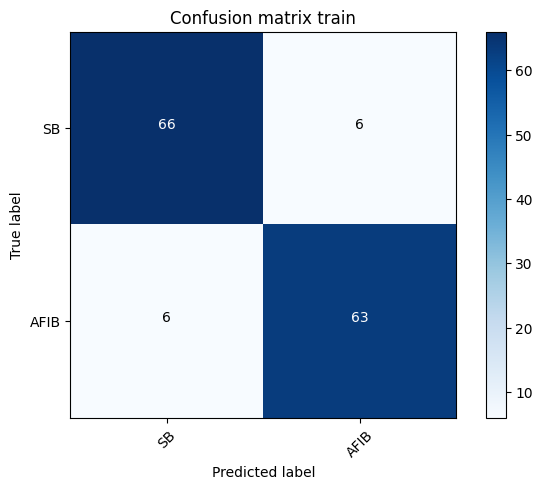

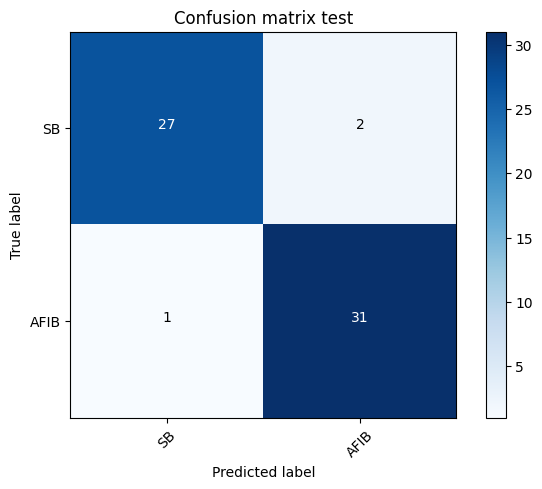

In [32]:
X = ML_predic[predictors].values
y = ML_predic[target_column].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
y_test = np.squeeze(y_test)
y_train = np.squeeze(y_train)
mlp = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
target_names = ['SB', 'AFIB']
print(classification_report(y_train,predict_train,target_names=target_names))
print(classification_report(y_test,predict_test,target_names=target_names))
mc_train = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(mc_train, classes=target_names,
                      title='Confusion matrix train')
mc_test = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(mc_test, classes=target_names,
                      title='Confusion matrix test')


## Red Neuronal Intermedia (2 capas ocultas: 32 y 16 neuronas)

              precision    recall  f1-score   support

          SB       0.96      0.94      0.95        72
        AFIB       0.94      0.96      0.95        69

    accuracy                           0.95       141
   macro avg       0.95      0.95      0.95       141
weighted avg       0.95      0.95      0.95       141

              precision    recall  f1-score   support

          SB       1.00      0.97      0.98        29
        AFIB       0.97      1.00      0.98        32

    accuracy                           0.98        61
   macro avg       0.98      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61

Confusion matrix, without normalization
[[68  4]
 [ 3 66]]
Confusion matrix, without normalization
[[28  1]
 [ 0 32]]


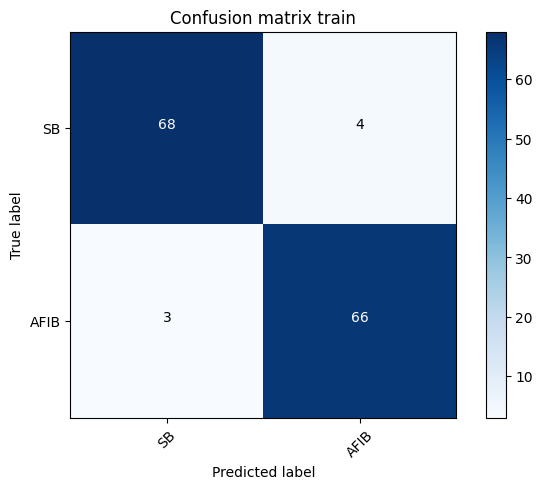

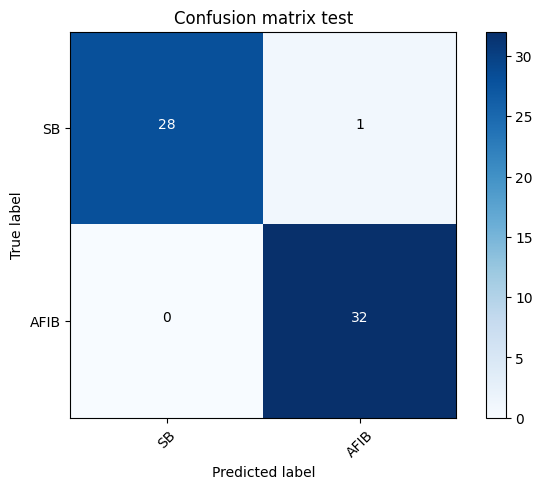

In [33]:
X = ML_predic[predictors].values
y = ML_predic[target_column].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
y_test = np.squeeze(y_test)
y_train = np.squeeze(y_train)
mlp = MLPClassifier(hidden_layer_sizes=(32,16), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
target_names = ['SB', 'AFIB']
print(classification_report(y_train,predict_train,target_names=target_names))
print(classification_report(y_test,predict_test,target_names=target_names))
mc_train = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(mc_train, classes=target_names,
                      title='Confusion matrix train')
mc_test = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(mc_test, classes=target_names,
                      title='Confusion matrix test')

## Red neuronal de alta complejidad (3 capas ocultas: 64, 32 y 16 neuronas)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

          SB       1.00      0.99      0.99        72
        AFIB       0.99      1.00      0.99        69

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141

              precision    recall  f1-score   support

          SB       1.00      0.93      0.96        29
        AFIB       0.94      1.00      0.97        32

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

Confusion matrix, without normalization
[[71  1]
 [ 0 69]]
Confusion matrix, without normalization
[[27  2]
 [ 0 32]]


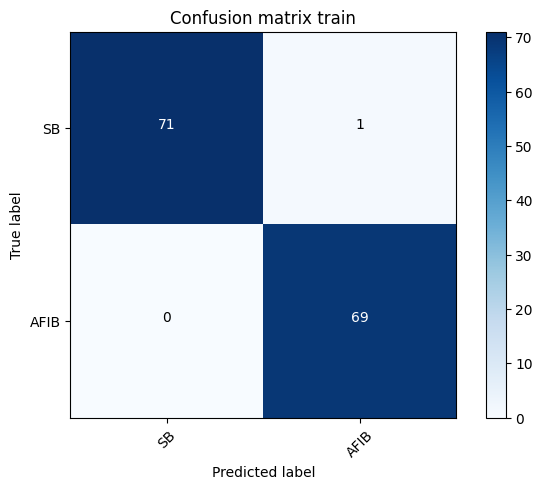

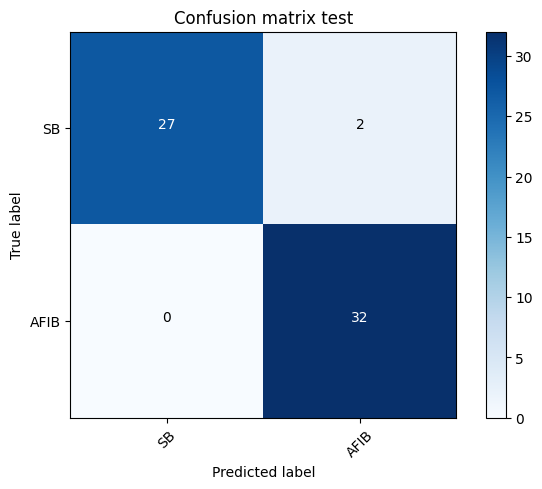

In [34]:
X = ML_predic[predictors].values
y = ML_predic[target_column].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
y_test = np.squeeze(y_test)
y_train = np.squeeze(y_train)
mlp = MLPClassifier(hidden_layer_sizes=(64,32,16), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
target_names = ['SB', 'AFIB']
print(classification_report(y_train,predict_train,target_names=target_names))
print(classification_report(y_test,predict_test,target_names=target_names))
mc_train = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(mc_train, classes=target_names,
                      title='Confusion matrix train')
mc_test = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(mc_test, classes=target_names,
                      title='Confusion matrix test')